# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

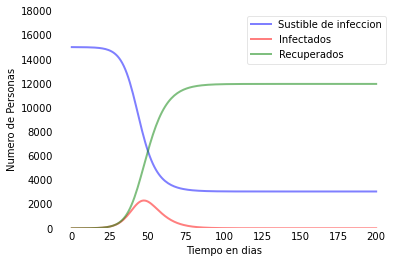

In [108]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Ro = beta/gamma
#print(Ro)

## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


<center><h1>Universidad Politecnica Salesiana</h1></center>
<center><h2>MODELO SIR</h2></center>
<center><h3>Marcela Zhagüi</h3></center>

In [141]:
df = pd.read_csv('time_series_19_covid_combined.csv')

df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed','Recovered']]
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,Date,Confirmed,Recovered
34344,308,171433,149048.0
34345,309,171783,149048.0
34346,310,172508,149048.0
34347,311,173486,149048.0
34348,312,174907,154956.0
34349,313,175269,154956.0
34350,314,175711,154956.0
34351,315,176630,154956.0
34352,316,177513,154956.0
34353,317,178674,154956.0


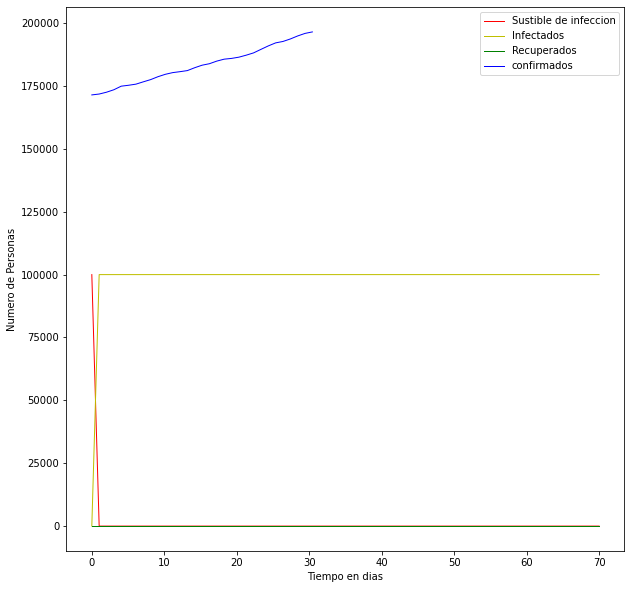

In [151]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador

# 1. Implementar solo teniendo en cuenta los casos confirmados
def loss(point, datos, s0, i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - datos)**2))

#Numero habitantes del Ecuador
N=100000
#casos confirmados
i0=2
#Recuperados
r0=10
#Resto de la poblacion
s0= N - i0 - r0

x = np.array(df['Date'])

y = list(df.iloc [:, 1])
datos=list(df.iloc [:, 1])
optimal = minimize(loss, [0.001, 0.001], args=(datos,s0,i0, r0), method='L-BFGS-B', bounds=[(0.00000001,0.4), (0.00000001, 0.4)])   
beta, gamma = optimal.x
new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
t = np.linspace(0, 70, 70)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0,i0,r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
xa=t[0:31]
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'r', alpha=1, lw=1, label='Sustible de infeccion')
ax.plot(t, I, 'y', alpha=1, lw=1, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=1, label='Recuperados')
ax.plot(xa, ea, 'b', alpha=1, lw=1, label='confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()


In [98]:
# Implementar

Beta=  0.009517828085153265
Gamma=  0.009514564186810357


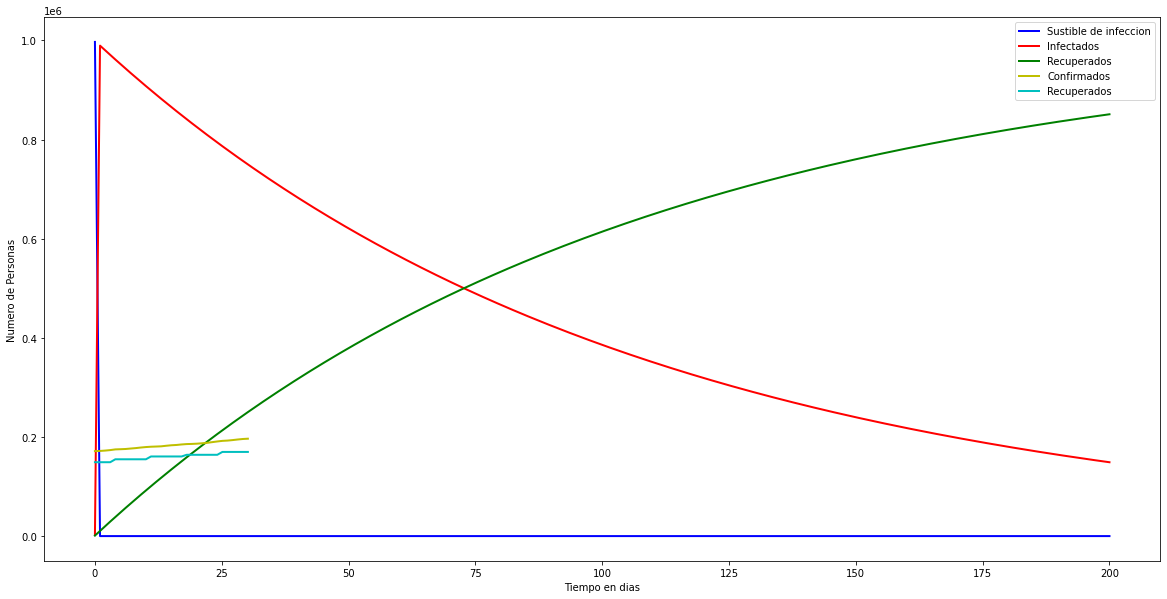

In [155]:
def loss(point, datos, recovered,s0,i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - datos)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha =0.1
    return alpha * l1 + (1 - alpha) * l2
#Numero habitantes del Ecuador
N=1000000
#casos confirmados
i0=2000
#Recuperados
r0=1000
#Resto de la poblacion
s0= N - i0 - r0
recovered=list(df.iloc [:, 2])
y=list(df.iloc [:, 1])
datos=list(df.iloc [:, 1])
d=[x1 - x2 for (x1, x2) in zip(datos,recovered)]
optimal = minimize(loss, [0.001, 0.001], args=(d, recovered, s0, i0, i0), method='L-BFGS-B', bounds=[(0.00000001, 0.04), (0.00000001, 0.04)])
beta, gamma = optimal.x
print("Beta= ",beta)
print("Gamma= ",gamma)
new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
er = np.concatenate((recovered, [None] * (size - len(recovered))))
xa=t[0:31]

t = np.linspace(0, 200,200)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I- gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
# Vector de condiciones iniciales
y0 = s0,i0,r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=1, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=2, label='Recuperados')
ax.plot(xa, y, 'y', alpha=1, lw=2, label='Confirmados')
ax.plot(xa, er, 'c', alpha=1, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
legend = ax.legend()


## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [156]:
# Implementar
import statistics as stats
casosNuevos=df.iloc [:, 1]
dias=df.iloc [:, 0]
totalPersonas=17283338#Inicdencia desde el dia uno
incidencia=(casosNuevos/totalPersonas)*1**4 #n=4 numero de mortailidad por caso de pandemia 
print("Inicidencia\n",incidencia)

totalCasos=7257
#prevalencia desde el dia uno
prevalencia=((casosNuevos/totalPersonas)*1**4)*stats.median(dias)
print("\nPrevalencia\n",prevalencia)

Inicidencia
 34344    0.010071
34345    0.010091
34346    0.010134
34347    0.010191
34348    0.010275
34349    0.010296
34350    0.010322
34351    0.010376
34352    0.010428
34353    0.010496
34354    0.010552
34355    0.010591
34356    0.010614
34357    0.010639
34358    0.010706
34359    0.010765
34360    0.010800
34361    0.010860
34362    0.010905
34363    0.010923
34364    0.010952
34365    0.010999
34366    0.011052
34367    0.011134
34368    0.011215
34369    0.011286
34370    0.011319
34371    0.011377
34372    0.011448
34373    0.011507
34374    0.011542
Name: Confirmed, dtype: float64

Prevalencia
 34344    3.252826
34345    3.259467
34346    3.273224
34347    3.291780
34348    3.318743
34349    3.325612
34350    3.333998
34351    3.351436
34352    3.368190
34353    3.390219
34354    3.408302
34355    3.420977
34356    3.428206
34357    3.436327
34358    3.458071
34359    3.476970
34360    3.488241
34361    3.507898
34362    3.522451
34363    3.528163
34364    3.537498
34365

## Analisis

Se obtiene el calculo del modelo SIR con los datos de :
#Habitantes del Ecuador = 17 millones
#Personas infectadas
#Personas recuperadas

Se calculo Beta y Gamma en el método loss que utiliza el método minimize(), de la librería scipy.optimize que necesita un objeto como parámetro y los datos de mínimos en los arreglos [0.001, 0.001] y el method='L-BFGS-B' Con estos datos el modelo SIR desarrollo las predicciones de los datos En las gráficas como se observa en el programa mostrando las curvas y su crecimiento y su relación

## Conclusiones
Si la curva de recuperados sube entonces las personas susceptibles de infección baja y por lo tanto los infectos se mantienen, estos datos depende de los valores que se asignen ah gamma y beta, y también el # de habitantes en el caso de que el número de habitantes sea alto y los contagios sean pocos las gráficas mostraran líneas continuas, como se observa en la simulación realiza para 17 millones de habitantes con casos confirmados de 9.268 y recuperados 174.188 , y de acuerdo al tutorial seguido el calculo de beta y gamma

## Resultado
Beta=  0.009517828085153265
Gamma=  0.009514564186810357

## Opinion
Los contagios aumenta en el pais de manera drastica, esto se debe a la falta de apoyo de la población ya que al no realizar la cuarentana, y muchos locales de entretenimiento  no toman conciencia del reisgo que corre su propia persona y la del cliente,el numero aumenta pero el numero de recuperados es mínimo es se debe a que el país no tiene la gestion y cultura necesaria para tomar conciencia, el gobietno no lleva de mejor manera la situación, dado esto en los hospitales no se cuenta con los recursos necesarios para brindar ayuda a las personas, tampoco el personal médico tiene los recurso para tratar esta situacion ya que el pais no cuenta con los recursos economicos en salud, y así los casos aumentan. La ciudadanía también debería ser más responsable y acatar las normas de seguridad y prevención.

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2